# Decision Tree and Random Forest for Classification with Scitkit-learn

In this notebook, we will go through the tutorial for implement the DecisionTree and RandomForest classifiers in Scikit-learn library of python. 

We will show the example of the decision tree classifier and then the random forests classifier by using the **penguins dataset**. The goal of this problem is to predict three different species of penguins based on the information on these three species.

We begin with standard imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# helping show visualization on the Jupyter notebook
%matplotlib inline
sns.set()

## Loading Penguins dataset

In this example, the **penguins dataset** is available in the `seaborn` library. The dataset provides information on three different species of penguins, including *Adelie*, *Gentoo*, and *Chinstrap* penguins.

Let load the dataset to see what your are working with:

In [2]:
df = sns.load_dataset('penguins')

We can view some first samples of the data by `head()` function:

In [3]:
# print first 10 observation in the data
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


The dataset provides a number of data columns, some of which are numeric and others are categorical. We can get overall information of the data using `info()` function:

In [4]:
# print some overall information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Machine learning models can't work with missing data and categorical or string data. By reviewing the information return by `info()` function, we can see that both of these problems exists in the data. In order to able to use this dataset for classification, we first find the ways to missing and categorical data.

## Dealing with missing data

In fact, trying building a decision tree (and, by extension, a random forest) with missing data results in a `ValueError` being raised.

While `info()` function tell a little bit about `non-null` datatype, this can often be harder to interpret. We can calculate the number of missing values in each column by chaining the `isnull()` and `sum()` functions:

In [5]:
# show the number the missing values in each columns
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

When dealing withmissing values, we can use two main options:

#### 1. Drop missing records/observations

We excludes the observations/records with missing data. Although the learning model may becomes robust after removing missed data, the some important data may be lost.

In [6]:
# deleting rows - missing values
df_dropped = df.dropna()

In [7]:
# show number the missing values in each columns
df_dropped.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### 2. Impute missing numerical records/observations

Scikit-Learn comes with a class `SimpleImputer`, that allows to pass in a strategy to impute missing nummerical values. We can impute any missing missing value to be *the mean of the column*.

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
# create a SimpleImputer class
# the strategy to impute can be 'mean', median', 'most_frequent' and 'constant'
imputer_mean = SimpleImputer(missing_values=np.NaN, strategy='mean')

# fit the numerical columns to the imputer
columns = ['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']
imputer_mean = imputer_mean.fit(df[columns])

# transform the DataFrame column with the fitted data
df[columns] = imputer_mean.transform(df[columns])

In [10]:
# show number the missing values in each columns
df.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

### 3. Impute the missing categorical records/observations
Imputing categorical data can be a lot more complicated, especially when dealing with binary distributions. Because of this, we can:
1. Drop any records that the attribute value is missing.
2. Fill by the most prevalent category value. This may lead model bias with the most frequent value, so this method is efficient in **small dataset**.

In [11]:
# show value in the 'sex' column
df['sex'].head(10)

0      Male
1    Female
2    Female
3       NaN
4    Female
5      Male
6    Female
7      Male
8       NaN
9       NaN
Name: sex, dtype: object

In [12]:
def impute_nan_by_most_frequent(df, col_name):
    # get the most frequent value using `mode()` function
    most_frequent_value = df[col_name].mode()[0]
    # replace NaN values with the most frequent value
    return df[col_name].fillna(most_frequent_value)

In [13]:
# get all categorical columns
columns = ['sex']

# replace NaN categorical values by the most frequent value in each column
for col_name in columns:
    df[col_name] = impute_nan_by_most_frequent(df, col_name)

In [14]:
# show the results
df[col_name].head(10)

0      Male
1    Female
2    Female
3      Male
4    Female
5      Male
6    Female
7      Male
8      Male
9      Male
Name: sex, dtype: object

In [15]:
# show number the missing values in each columns
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Dealing with categorical data

Similar to dealing with missing values, machine learning models can also generally only work with numerical data. Because of this, we need to convert our categorical data into numerical data.

Let’s deal with the sex attribute first. Because the sex attribute is binary (either male or female), we can assign the value of either 1 or 0, depending on the sex. This can be done easily with the `map()` Series method.

In [16]:
# Mapping the sex variable to binary values
df['sex_int'] = df['sex'].map({'Male': 0, 'Female': 1})

In [17]:
df[['sex', 'sex_int']].head(10)

,sex,sex_int
0,Male,0
1,Female,1
2,Female,1
3,Male,0
4,Female,1
5,Male,0
6,Female,1
7,Male,0
8,Male,0
9,Male,0


The other categorical value is the `island` attribute. Let’s see what the unique values in this column are:

In [18]:
# Checking unique values in the island attribute
print(df['island'].unique())

['Torgersen' 'Biscoe' 'Dream']


In the case of the `island` feature, there are three values. Because of this, we can not simply pass in a binary mapping. Similarly, passing in values of `0, 1, 2` would also present problems, because the values do not actually imply a hierarchy. The difference between 0 and 2 would amplify any decisions decision tree or random forest would make.

A simple way to deal with this would be to use a process referred to as one-hot encoding. The unique values of that column are used to create columns where a value of either 0 or 1 is assigned.

![](https://e6v4p8w2.rocketcdn.me/wp-content/uploads/2022/01/One-Hot-Encoding-for-Scikit-Learn-in-Python-Explained-1024x576.png)

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
# One-hot Encoding the island attribute
one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(df[['island']])
# categories_ attribute contains a list containing an array of the attribute names
df[one_hot.categories_[0].tolist()] = encoded.toarray()

In [21]:
columns = ['island'] + one_hot.categories_[0].tolist()
df[columns]

,island,Biscoe,Dream,Torgersen
0,Torgersen,0.0,0.0,1.0
1,Torgersen,0.0,0.0,1.0
2,Torgersen,0.0,0.0,1.0
3,Torgersen,0.0,0.0,1.0
4,Torgersen,0.0,0.0,1.0
...,...,...,...,...
339,Biscoe,1.0,0.0,0.0
340,Biscoe,1.0,0.0,0.0
341,Biscoe,1.0,0.0,0.0
342,Biscoe,1.0,0.0,0.0


Now that you’ve dealt with missing and categorical data, the original columns can be dropped from the DataFrame. Let’s do this now:

In [22]:
# Dropping Unnecessary Columns
df = df.drop(columns=['island', 'sex'])

In the next section, you’ll learn how to use this newly cleaned DataFrame to build a Decision Tree

## Creating the decision tree classifier for Penguins dataset

Now, let’s dive into how to create a decision tree classifier using Scikit-learn in Python. Scikit-Learn can handle this using the `DecisionTreeClassifier` class from the `sklearn.tree` module.

In [23]:
# import the required classes
# splitting the data and creating a model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
seed = 100

Before training model, the data is split using `train_test_split()` function

In [24]:
X = df.iloc[:, 1:] # ignore the first row due to it is the heading row
y = df['species']
# train test split
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=test_size, random_state=seed)

In [25]:
# create decision tree model and fit data
dt = DecisionTreeClassifier(random_state=seed)
dt.fit(X_train, y_train)

# predict on test set
y_pred = dt.predict(X_test)

Then we evaluate the decision model.

In [26]:
from sklearn import metrics

In [27]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9711538461538461


<AxesSubplot:>

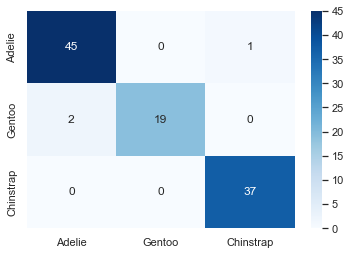

In [28]:
# show confusion matrix
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Adelie', 'Gentoo', 'Chinstrap']
sns.heatmap(cf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues')

In [29]:
# classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       0.96      0.98      0.97        46
   Chinstrap       1.00      0.90      0.95        21
      Gentoo       0.97      1.00      0.99        37

    accuracy                           0.97       104
   macro avg       0.98      0.96      0.97       104
weighted avg       0.97      0.97      0.97       104



We can plot our decision tree to see the model look like with `plot_tree()` function.

In [30]:
from sklearn.tree import plot_tree

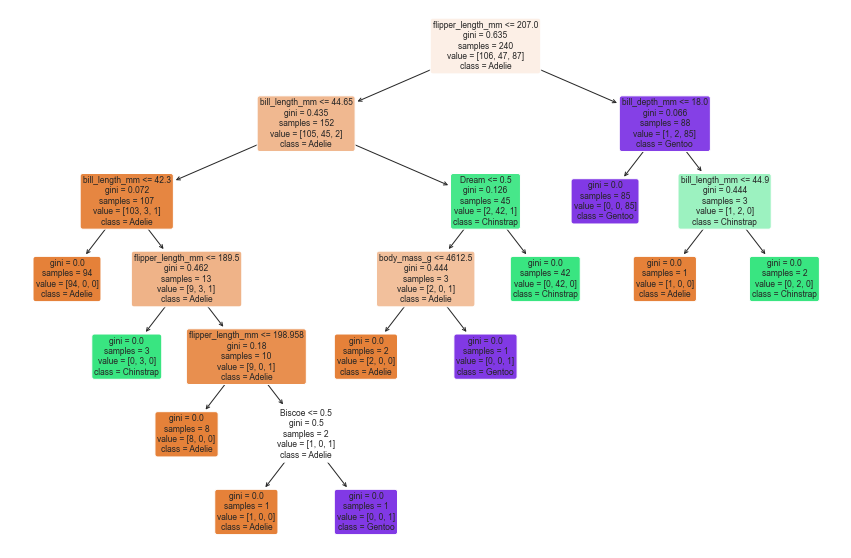

In [31]:
fig = plt.figure(figsize=(15, 10))
plot_tree(dt, 
          feature_names=X.columns,
          class_names=df['species'].unique(), 
          filled=True, rounded=True)

plt.show()

We can also get a textual representation of the tree by using the `export_tree()` function

In [32]:
from sklearn.tree import export_text

In [33]:
r = export_text(dt, feature_names=X.columns.tolist())
print(r)

|--- flipper_length_mm <= 207.00
|   |--- bill_length_mm <= 44.65
|   |   |--- bill_length_mm <= 42.30
|   |   |   |--- class: Adelie
|   |   |--- bill_length_mm >  42.30
|   |   |   |--- flipper_length_mm <= 189.50
|   |   |   |   |--- class: Chinstrap
|   |   |   |--- flipper_length_mm >  189.50
|   |   |   |   |--- flipper_length_mm <= 198.96
|   |   |   |   |   |--- class: Adelie
|   |   |   |   |--- flipper_length_mm >  198.96
|   |   |   |   |   |--- Biscoe <= 0.50
|   |   |   |   |   |   |--- class: Adelie
|   |   |   |   |   |--- Biscoe >  0.50
|   |   |   |   |   |   |--- class: Gentoo
|   |--- bill_length_mm >  44.65
|   |   |--- Dream <= 0.50
|   |   |   |--- body_mass_g <= 4612.50
|   |   |   |   |--- class: Adelie
|   |   |   |--- body_mass_g >  4612.50
|   |   |   |   |--- class: Gentoo
|   |   |--- Dream >  0.50
|   |   |   |--- class: Chinstrap
|--- flipper_length_mm >  207.00
|   |--- bill_depth_mm <= 18.00
|   |   |--- class: Gentoo
|   |--- bill_depth_mm >  18.00
|  

## Creating the random forest classifier for Penguins dataset

Remember, a random forest is made up of decision trees. But that does not mean that you need to actually create any decision trees! Scikit-learn can handle this using the `RandomForestClassifier` class from the `sklearn.ensemble` module.

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
# create a random forest model
forest = RandomForestClassifier(n_estimators=100, random_state=seed)

# Fitting a model and making predictions
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)

Now we evaluate the result of the trained random forest.

In [36]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9903846153846154


<AxesSubplot:>

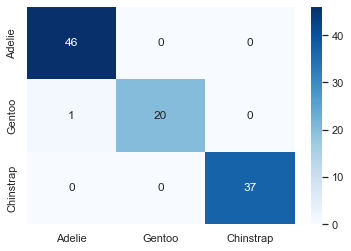

In [37]:
# show confusion matrix
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Adelie', 'Gentoo', 'Chinstrap']
sns.heatmap(cf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues')

In [38]:
# classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        46
   Chinstrap       1.00      0.95      0.98        21
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       104
   macro avg       0.99      0.98      0.99       104
weighted avg       0.99      0.99      0.99       104



Compare to the trained single decision tree, random forest perform better! (0.971 vs 0.990 in accuracy)